In [ ]:
from statsmodels.tsa.arima_model import ARIMA

You are given 5 years of store-item sales data, and asked to predict 3 months of sales for 50 different items at 10 different stores.

In [ ]:
search_space = ((1,5), (0,1), (0,1,5))

In [54]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import pandas as pd
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
train = pd.read_csv('train.csv')
train['date'] = pd.to_datetime(train['date'], format="%Y-%m")
train['store'] = train['store'].astype(float)
train['item'] = train['item'].astype(float)
train['sales'] = train['sales'].astype(float)
train = train.set_index('date')
train = train.groupby('store')
store_dfs = {}
for store, df in train:
	store_df = pd.DataFrame(df)
	store_df = store_df.drop(columns=['store'])
	store_dfs[store] = store_df

store1_df = store_dfs[1.0]
store2_df = store_dfs[2.0]
store3_df = store_dfs[3.0]
store4_df = store_dfs[4.0]
store5_df = store_dfs[5.0]
store6_df = store_dfs[6.0]
store7_df = store_dfs[7.0]
store8_df = store_dfs[8.0]
store9_df = store_dfs[9.0]
store10_df = store_dfs[10.0]

store5_df

<ipython-input-54-6a278edf32ac>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


,item,sales
date,,
2013-01-01,1.0,11.0
2013-01-02,1.0,9.0
2013-01-03,1.0,12.0
2013-01-04,1.0,8.0
2013-01-05,1.0,13.0
...,...,...
2017-12-27,50.0,35.0
2017-12-28,50.0,39.0
2017-12-29,50.0,37.0


In [57]:
grouped_df = store1_df.groupby('item')

item_dfs = {}

for item, df in grouped_df:
    item_df = pd.DataFrame(df)
    
    item_df = item_df.drop(columns=['item'])
    
    item_dfs[item] = item_df
    
item1_df = item_dfs[1.0]
item2_df = item_dfs[2.0]
item3_df = item_dfs[3.0]
item4_df = item_dfs[4.0]
item5_df = item_dfs[5.0]
item6_df = item_dfs[6.0]
item7_df = item_dfs[7.0]
item8_df = item_dfs[8.0]
item9_df = item_dfs[9.0]
item10_df = item_dfs[10.0]

item11_df = item_dfs[11.0]
item12_df = item_dfs[12.0]
item13_df = item_dfs[13.0]
item14_df = item_dfs[14.0]
item15_df = item_dfs[15.0]
item16_df = item_dfs[16.0]
item17_df = item_dfs[17.0]
item18_df = item_dfs[18.0]
item19_df = item_dfs[19.0]
item20_df = item_dfs[20.0]

item21_df = item_dfs[21.0]
item22_df = item_dfs[22.0]
item23_df = item_dfs[23.0]
item24_df = item_dfs[24.0]
item25_df = item_dfs[25.0]
item26_df = item_dfs[26.0]
item27_df = item_dfs[27.0]
item28_df = item_dfs[28.0]
item29_df = item_dfs[29.0]
item30_df = item_dfs[30.0]

item31_df = item_dfs[31.0]
item32_df = item_dfs[32.0]
item33_df = item_dfs[33.0]
item34_df = item_dfs[34.0]
item35_df = item_dfs[35.0]
item36_df = item_dfs[36.0]
item37_df = item_dfs[37.0]
item38_df = item_dfs[38.0]
item39_df = item_dfs[39.0]
item40_df = item_dfs[40.0]

item41_df = item_dfs[41.0]
item42_df = item_dfs[42.0]
item43_df = item_dfs[43.0]
item44_df = item_dfs[44.0]
item45_df = item_dfs[45.0]
item46_df = item_dfs[46.0]
item47_df = item_dfs[47.0]
item48_df = item_dfs[48.0]
item49_df = item_dfs[49.0]
item50_df = item_dfs[50.0]

item1_df

,sales
date,
2013-01-01,13.0
2013-01-02,11.0
2013-01-03,14.0
2013-01-04,13.0
2013-01-05,10.0
...,...
2017-12-27,14.0
2017-12-28,19.0
2017-12-29,15.0


<ipython-input-58-e70481ca9deb>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1826
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5747.569
Date:                Fri, 17 Feb 2023   AIC                          11507.139
Time:                        01:31:46   BIC                          11540.195
Sample:                    01-01-2013   HQIC                         11519.333
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7223      0.023    -31.913      0.000      -0.767      -0.678
ar.L2         -0.6015      0.026    -22.847      0.000      -0.653      -0.550
ar.L3         -0.4961      0.027    -18.270      0.0

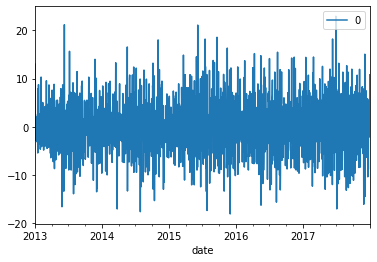

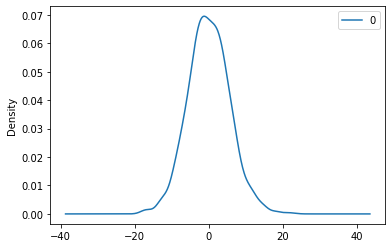

                 0
count  1826.000000
mean      0.021564
std       5.649697
min     -18.136845
25%      -3.685298
50%      -0.146881
75%       3.683919
max      22.954965


In [58]:
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot


# fit model
model = ARIMA(item1_df, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [62]:
test = read_csv('test.csv')
test

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1
...,...,...,...,...
44995,44995,2018-03-27,10,50
44996,44996,2018-03-28,10,50
44997,44997,2018-03-29,10,50
44998,44998,2018-03-30,10,50


<ipython-input-60-15b6600f9ab4>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


TypeError: ignored

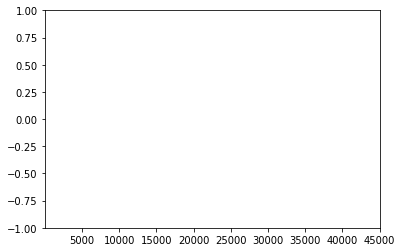

In [60]:
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)